In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Iquitos_train.csv', index_col = 0)

In [3]:
df.index = pd.to_datetime(df.index)
df.sort_index(inplace = True)

In [4]:
print('------ Basic Stats about the San Juan Training set ------ \n')
print(f'- Number of rows of the training set: {len(df)} \n')
print(f'- Number of columns of the training set: {len(df.columns)}, where the last on is the label \n')
perc = np.round(100 * df.isna().sum().sum() / (len(df) * len(df.columns)), 2)
print(f'- Percentage of missing values across the entire dataset {perc}% \n')
url = 'https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/82/'
print(f'- Description for all variables can be found here: {url} \n')

------ Basic Stats about the San Juan Training set ------ 

- Number of rows of the training set: 520 

- Number of columns of the training set: 23, where the last on is the label 

- Percentage of missing values across the entire dataset 1.4% 

- Description for all variables can be found here: https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/82/ 



In [5]:
# When we are filling NAs using a rolling window = 4, it means that if a value is NA then we take the mean
# of the 3 values that come before it chronologically and assign it to that value.
# Also the values that are not NA do not change (Just to be clear)!

In [6]:
df.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
week_start_date,,,,,,,,,,,,,,,,,,,,,
2000-07-01,2000,26,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,295.184286,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
2000-07-08,2000,27,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,298.428571,295.358571,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
2000-07-15,2000,28,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,297.392857,295.622857,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
2000-07-22,2000,29,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,296.228571,292.797143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
2000-07-29,2000,30,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,297.635714,293.957143,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


In [7]:
for col in df.columns[:-1]: # exclude the label variable
    df[col] = df[col].fillna(df.rolling(window = 4,
                                        min_periods = 1).mean()[col])

In [8]:
new_perc = np.round(100 * df.isna().sum().sum() / (len(df) * len(df.columns)), 2)
print(f'- The amount of NAs was reduced to {new_perc}% \n')
print('- For the next step we will fill the remaining NAs with zeroes \n')

- The amount of NAs was reduced to 0.11% 

- For the next step we will fill the remaining NAs with zeroes 



In [9]:
df = df.fillna(0)

In [10]:
new_perc = np.round(100 * df.isna().sum().sum() / (len(df) * len(df.columns)), 2)
print(f'- The amount of NAs was reduced to {new_perc}% \n')
print(f'- We are ready to make predictions! \n')

- The amount of NAs was reduced to 0.0% 

- We are ready to make predictions! 



In [11]:
# print(f'- Check the graphs of the variables. \n')
# fig, axs = plt.subplots(5, 5, figsize=(15, 15))
# k = 0
# for i in range(5):
#     for j in range(5):
#         axs[i,j].title.set_text(df.columns[k])
#         axs[i,j].get_xaxis().set_visible(False)
#         axs[i,j].plot(df.index, df[df.columns[k]])
#         k += 1
#         if k > 22:
#             break
# plt.tight_layout()
# plt.show()

In [12]:
# print(f'- Check the distributions of the variables to see if there are any outliers. \n')
# fig, axs = plt.subplots(5, 5, figsize=(15, 15))
# k = 0
# for i in range(5):
#     for j in range(5):
#         axs[i,j].title.set_text(df.columns[k])
#         axs[i,j].hist(df[df.columns[k]], bins = 50)
#         k += 1
#         if k > 22:
#             break
# plt.tight_layout()
# plt.show()

<AxesSubplot: >

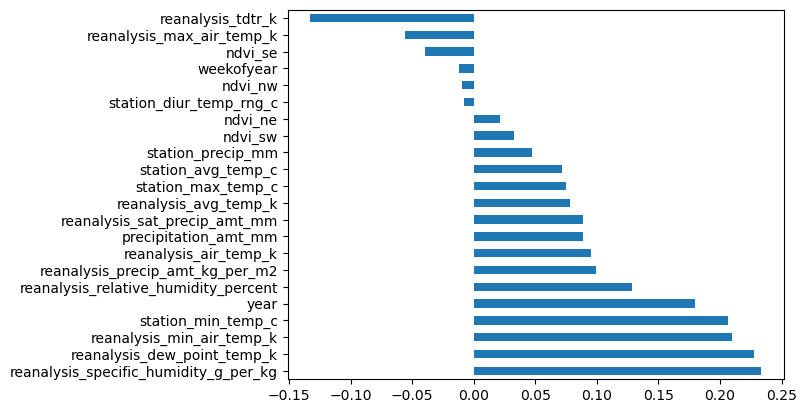

In [13]:
correlations = df.corr()
(correlations
     .total_cases
     .drop('total_cases')
     .sort_values(ascending=False)
     .plot
     .barh())

In [14]:
# - Identical columns: 'precipitation_amt_mm' & 'reanalysis_sat_precip_amt_mm' (drop one of them!)
# - Drop ndvi_ne & ndvi_nw
# - Convert to Celsius: reanalysis_air_temp_k reanalysis_avg_temp_k reanalysis_dew_point_temp_k 
# reanalysis_max_air_temp_k reanalysis_min_air_temp_k reanalysis_tdtr_k
# - Take the average of columns representing the same variable from different sources

In [15]:
# We may need to take some outliers out or drop some variables, but it doesn't seem so serious, so we will 
# leave it for now.

In [16]:
## --------------------------------------- ##
## ----- Further Feature Engineering ----- ##
## --------------------------------------- ##

In [17]:
# df.drop(['ndvi_ne', 'ndvi_nw'], axis = 1, inplace = True)
# df.drop('reanalysis_sat_precip_amt_mm', axis = 1, inplace = True)
# df[['reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
#     'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k']] += -273.15

# min_temp = pd.Series(np.mean(df[[col for col in df.columns if '_min_' in col]].values, axis = 1))
# min_temp.index = df.index
# df['min_temp'] = min_temp
# df.drop([col for col in df.columns if '_min_' in col], axis = 1, inplace = True)

# max_temp = pd.Series(np.mean(df[[col for col in df.columns if '_max_' in col]].values, axis = 1))
# max_temp.index = df.index
# df['max_temp'] = max_temp
# df.drop([col for col in df.columns if '_max_' in col], axis = 1, inplace = True)

# reanalysis_avg_temp_c = pd.Series(np.mean(df[['reanalysis_avg_temp_k', 'reanalysis_air_temp_k']], axis = 1))
# reanalysis_avg_temp_c.index = df.index
# df['reanalysis_avg_temp_c'] = reanalysis_avg_temp_c
# df.drop(['reanalysis_avg_temp_k', 'reanalysis_air_temp_k'], axis = 1, inplace = True)

In [18]:
# cols = df.columns.tolist()
# cols = cols[-3:] + cols[:-3]

<AxesSubplot: >

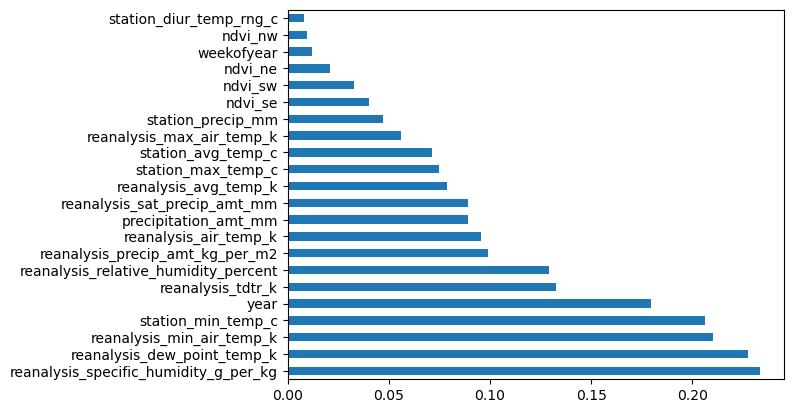

In [19]:
correlations = df.corr()
(abs(correlations)
     .total_cases
     .drop('total_cases')
     .sort_values(ascending=False)
     .plot
     .barh())

In [20]:
## -------------------------------------- ##
## ----- End of Feature Engineering ----- ##
## -------------------------------------- ##

<AxesSubplot: xlabel='week_start_date'>

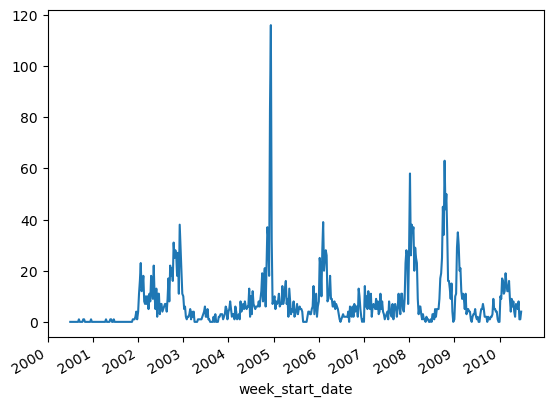

In [21]:
df['total_cases'].plot()

In [22]:
################# -------------------------------------- #################
################# -------------------------------------- #################
################# -------------------------------------- #################
################# -------------------------------------- #################
################# -------------------------------------- #################

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

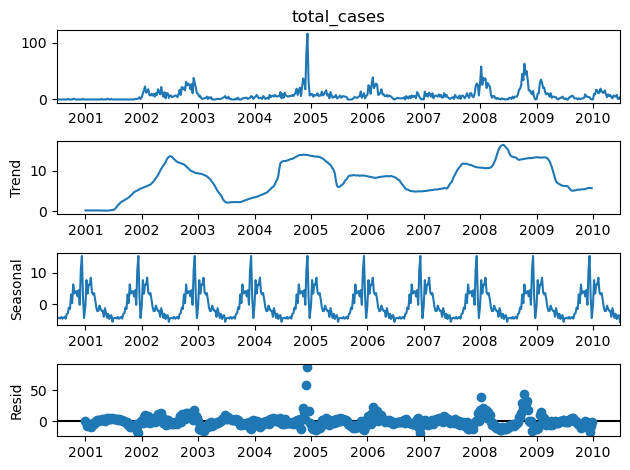

In [24]:
result = seasonal_decompose(x = df['total_cases'], model = 'add', period = 52)
result.plot();

In [25]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

def check_stationarity(yout):
    dftest = adfuller(df['total_cases'])
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary, so D = 0')
    else:
        print('The series is NOT stationary')

In [26]:
seasonal = result.seasonal
check_stationarity(seasonal)

The series is stationary, so D = 0


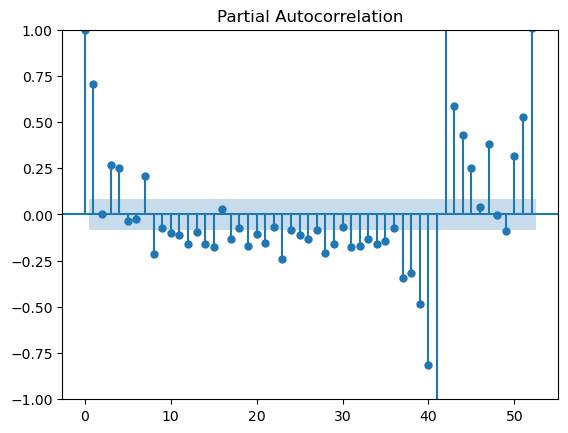

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(seasonal, lags = 52)
plt.show()

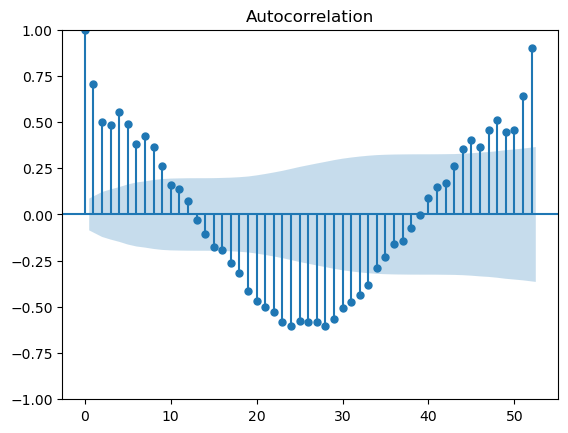

In [28]:
plot_acf(seasonal, lags = 52)
plt.show()

In [29]:
# Q = 0

In [35]:
# This might take a while (a lot actually).
auto = auto_arima(y = df['total_cases'], X = df.iloc[:, : -1], seasonal = True, m = 52)

In [36]:
auto

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 52),
      suppress_warnings=True, with_intercept=False)

In [69]:
int(train_amount * len(df)) - 520

-234

In [70]:
train_amount = 0.55
df_x_train = df.iloc[:int(train_amount * len(df)), : -1]
df_x_test = df.iloc[int(train_amount * len(df)):, : -1]

df_y_train = df.iloc[:int(train_amount * len(df)), -1]
df_y_test = df.iloc[int(train_amount * len(df)):, -1]

In [71]:
model = SARIMAX(endog = df_y_train, exog = df_x_train, order = (0, 0, 0), seasonal_order = (0, 0, 0, 52),
                enforce_invertibility = False)

/Users/alexanderliapatis/miniconda3/envs/dengAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/alexanderliapatis/miniconda3/envs/dengAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [72]:
results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           23     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.02667D+00    |proj g|=  6.03918D-03

At iterate    5    f=  5.51387D+00    |proj g|=  1.86400D+01

At iterate   10    f=  5.26070D+00    |proj g|=  1.68867D+00


 This problem is unconstrained.



At iterate   15    f=  4.36985D+00    |proj g|=  1.95688D+01

At iterate   20    f=  4.22329D+00    |proj g|=  5.12746D+00

At iterate   25    f=  4.14792D+00    |proj g|=  5.30813D-01

At iterate   30    f=  4.11696D+00    |proj g|=  1.76102D+00

At iterate   35    f=  4.07581D+00    |proj g|=  4.90179D-02

At iterate   40    f=  4.07207D+00    |proj g|=  2.21745D-01

At iterate   45    f=  3.98088D+00    |proj g|=  4.61068D+00

At iterate   50    f=  3.84013D+00    |proj g|=  1.26260D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   23     50     75      1     0     0   1.263D+00   3.840D+00
  F =   3.84013376360

/Users/alexanderliapatis/miniconda3/envs/dengAI/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [60]:
start = len(df_x_train)
end = len(df_x_train) + len(df_x_test) - 1

In [61]:
predictions = np.round(results.predict(start, end, exog = df_x_test))
predictions.index = df_x_test.index
predictions[predictions < 0] = 0

/Users/alexanderliapatis/miniconda3/envs/dengAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot: xlabel='week_start_date'>

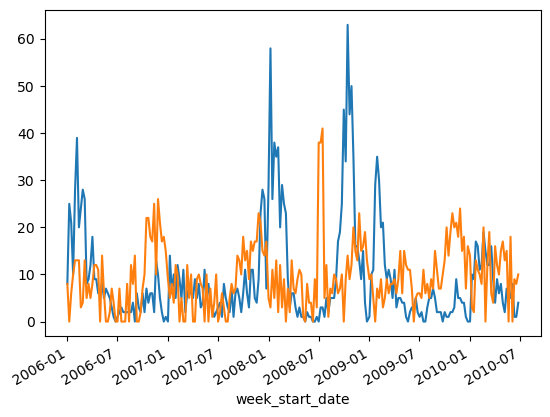

In [62]:
df_y_test.plot()
predictions.plot()

In [63]:
# df_y_test.values

In [64]:
# predictions.values

In [65]:
# Mean Absolute Error Calculation
np.mean(np.abs(df_y_test.values - predictions.values))

9.217948717948717

In [ ]:
# We have only trained on the dataset for San Juan thus far.
# The Iquitos reamins.